In [1]:
import geopandas as gpd
from longsgis import voronoiDiagram4plg
import matplotlib.pyplot as plt
import pedpy
import pathlib
import pandas as pd
from shapely import Polygon

In [2]:
def plot_polygon(polygon, ax, facecolor="blue"):
    """plots a polygon with its interior in matplotlib"""
    poly = gpd.GeoSeries([polygon])
    poly.plot(ax=ax, edgecolor="Black", facecolor=facecolor)

In [3]:
traj = pedpy.load_trajectory(
    trajectory_file=pathlib.Path("040_c_56_h-.txt")
)
bounds =  Polygon(
    # complete area
    [
        (3.5, -2),
        (3.5, 8),
        (-3.5, 8),
        (-3.5, -2),
    ],
    holes=[
        # left barrier
        [
            (-0.7, -1.1),
            (-0.25, -1.1),
            (-0.25, -0.15),
            (-0.4, 0.0),
            (-2.8, 0.0),
            (-2.8, 6.7),
            (-3.05, 6.7),
            (-3.05, -0.3),
            (-0.7, -0.3),
            (-0.7, -1.0),
        ],
        # right barrier
        [
            (0.25, -1.1),
            (0.7, -1.1),
            (0.7, -0.3),
            (3.05, -0.3),
            (3.05, 6.7),
            (2.8, 6.7),
            (2.8, 0.0),
            (0.4, 0.0),
            (0.25, -0.15),
            (0.25, -1.1),
        ],
    ],
)

In [4]:
individual = pedpy.compute_individual_voronoi_polygons(
    traj_data=traj, walkable_area=pedpy.WalkableArea(bounds)
)
measurement_area = pedpy.MeasurementArea(
    [(-0.4, 0.5), (0.4, 0.5), (0.4, 1.3), (-0.4, 1.3)]
)


<Axes: title={'center': 'Voronoi density normal'}, xlabel='frame', ylabel='$\\rho$ / 1/$m^2$'>

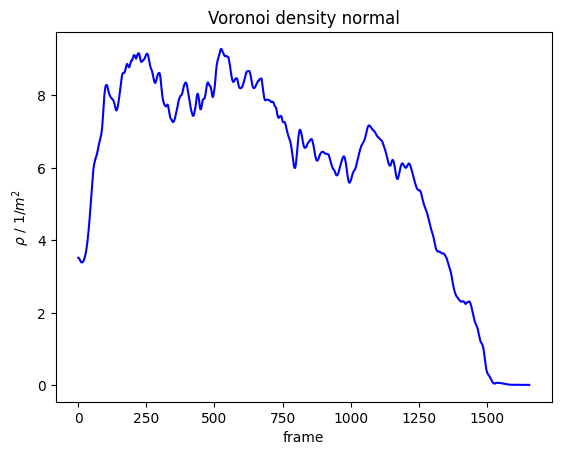

In [5]:
density_voronoi, intersecting = pedpy.compute_voronoi_density(
    individual_voronoi_data=individual, measurement_area=measurement_area
)
pedpy.plot_density(
    density=density_voronoi, title="Voronoi density normal", color="blue"
)

In [6]:
def create_circle_polygon(point, radius):
    return Polygon(point.buffer(radius, quad_segs=2).exterior.coords)

In [7]:
radius = 0.5
voronoi_05 = pd.DataFrame(columns=['id', 'frame', 'polygon', 'density'])
for frame, data in traj.data.groupby('frame'):
    data['geometry'] = data['point'].apply(lambda x: create_circle_polygon(x, radius))
    data['area'] = data['geometry'].apply(lambda x: x.area)
    used_data = gpd.GeoDataFrame( data[['area', 'geometry']] ) 

    try:
        vd = voronoiDiagram4plg(used_data, bounds)
        df_to_add = pd.DataFrame({'id':list(data['id']), 'frame':frame, 'polygon':list(vd['geometry']), 'density':0})
        
        voronoi_05 = pd.concat([voronoi_05, df_to_add])
    except Exception as e:
        print(f"frame {frame} did not work properly")
        #raise e
        continue

In [8]:
radius = 0.3
voronoi_03 = pd.DataFrame(columns=['id', 'frame', 'polygon', 'density'])
for frame, data in traj.data.groupby('frame'):
    data['geometry'] = data['point'].apply(lambda x: create_circle_polygon(x, radius))
    data['area'] = data['geometry'].apply(lambda x: x.area)
    used_data = gpd.GeoDataFrame( data[['area', 'geometry']] ) 

    try:
        vd = voronoiDiagram4plg(used_data, bounds)
        df_to_add = pd.DataFrame({'id':list(data['id']), 'frame':frame, 'polygon':list(vd['geometry']), 'density':0})
        
        voronoi_03 = pd.concat([voronoi_03, df_to_add])
    except Exception as e:
        print(f"frame {frame} did not work properly")
        #raise e
        continue

frame 1245 did not work properly
frame 1246 did not work properly
frame 1450 did not work properly
frame 1606 did not work properly


punkt (0.3166320343559642, -1.0912679656440356) des polygon POLYGON ((0.4045 -1.3034, 0.3166320343559643 -1.5155320343559642, 0.1045 -1.6034, -0.1076320343559642 -1.5155320343559642, -0.1955 -1.3034, -0.1076320343559643 -1.0912679656440356, 0.1044999999999999 -1.0033999999999998, 0.3166320343559642 -1.0912679656440356, 0.4045 -1.3034)) überlappt mit dem Rand
punkt (0.2585, -0.4975) des polygon POLYGON ((0.2585 -0.4975, 0.1706320343559642 -0.7096320343559642, -0.0415 -0.7975, -0.2536320343559642 -0.7096320343559642, -0.3415 -0.4975, -0.2536320343559643 -0.2853679656440358, -0.0415000000000001 -0.1975, 0.1706320343559642 -0.2853679656440357, 0.2585 -0.4975)) überlappt mit dem Rand
punkt (-0.2536320343559642, -0.7096320343559642) des polygon POLYGON ((0.2585 -0.4975, 0.1706320343559642 -0.7096320343559642, -0.0415 -0.7975, -0.2536320343559642 -0.7096320343559642, -0.3415 -0.4975, -0.2536320343559643 -0.2853679656440358, -0.0415000000000001 -0.1975, 0.1706320343559642 -0.2853679656440357, 

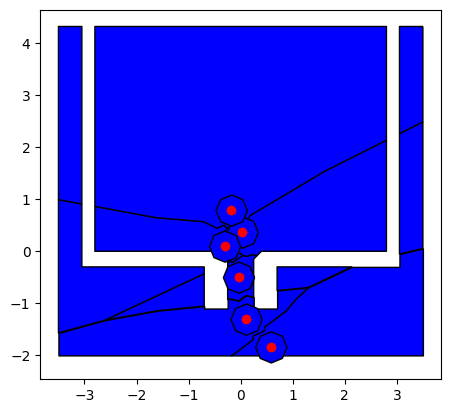

In [9]:
from shapely import Point
frame = 1555
h1 = Polygon([(-0.7, -1.1),(-0.25, -1.1),(-0.25, -0.15),(-0.4, 0.0),(-2.8, 0.0),(-2.8, 6.7),(-3.05, 6.7),(-3.05, -0.3),(-0.7, -0.3),(-0.7, -1.0)])
h2 = Polygon([(0.25, -1.1), (0.7, -1.1),(0.7, -0.3),(3.05, -0.3),(3.05, 6.7),(2.8, 6.7),(2.8, 0.0),(0.4, 0.0),(0.25, -0.15),(0.25, -1.1)])
fig, ax = plt.subplots()
for poly in voronoi_03[voronoi_03['frame']==frame]['polygon']:
    plot_polygon(poly, ax)

polies = traj.data[traj.data['frame']==frame]['point'].apply(lambda x: create_circle_polygon(x, radius))

for poly in polies:
    plot_polygon(poly, ax)
    for point in poly.exterior.coords:
        if Point(point).within(h1) or Point(point).within(h2):
            print(f"punkt {point} des polygon {poly} überlappt mit dem Rand")

ax.scatter(traj.data[traj.data['frame']==frame]['x'], traj.data[traj.data['frame']==frame]['y'], c='red')

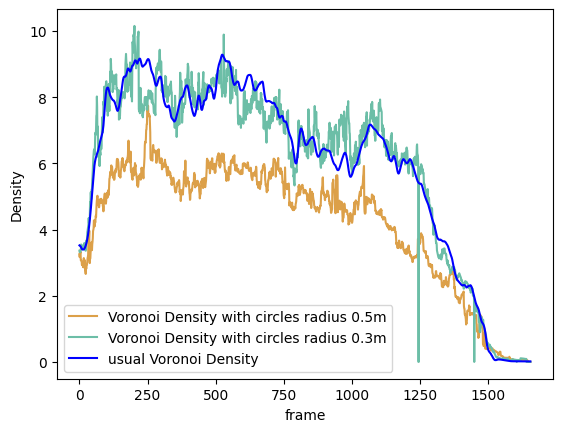

In [10]:
density_voronoi_poly_05, intersecting = pedpy.compute_voronoi_density(
    individual_voronoi_data=voronoi_05, measurement_area=measurement_area
)
density_voronoi_poly_03, intersecting = pedpy.compute_voronoi_density(
    individual_voronoi_data=voronoi_03, measurement_area=measurement_area
)


plt.plot(density_voronoi_poly_05.index, density_voronoi_poly_05, c=pedpy.PEDPY_ORANGE, label="Voronoi Density with circles radius 0.5m")

plt.plot(density_voronoi_poly_03.index, density_voronoi_poly_03, c=pedpy.PEDPY_GREEN, label="Voronoi Density with circles radius 0.3m")
plt.plot(density_voronoi.index, density_voronoi, c="blue", label="usual Voronoi Density")
plt.xlabel("frame")
plt.ylabel("Density")
plt.legend()
#plt.savefig("Voronoi-Density_Difference")
plt.show()